In [1]:
import sys
import time
import os
import subprocess
import math
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, Column 
from scipy.stats import linregress
from scipy import interpolate
from scipy import polyval, polyfit
from scipy.optimize import curve_fit
from scipy import odr
import pylab as py
from matplotlib import gridspec
import sklearn.datasets as ds
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import corner
import emcee
import scipy.optimize as op
from scipy.linalg import cholesky, inv,det
from scipy.optimize import minimize
import random
from astropy.table import Table, Column
from linear_mcmc import *

from redTools import *
from Kcorrect import *
from calibTools import *

In [2]:
####################################### Set Axes
def set_axes(ax, xlim=None, ylim=None, fontsize=16, twinx=True, twiny=True, minor=True, inout='in'):
        
        if not ylim is None:
            ax.set_ylim(ylim)
        else:
            ylim = ax.get_ylim() 
            
        if not xlim is None:    
            ax.set_xlim(xlim) 
        else:
            xlim = ax.get_xlim()
            
        ax.tick_params(which='major', length=6, width=1., direction=inout)
#         if minor:
        ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout)  
        
        if twiny:
            y_ax = ax.twinx()
            y_ax.set_ylim(ylim)
            y_ax.set_yticklabels([])
            y_ax.minorticks_on()
            y_ax.tick_params(which='major', length=6, width=1., direction=inout)
            if minor:
                y_ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout) 
        table
        if twinx:
            x_ax = ax.twiny()
            x_ax.set_xlim(xlim)
            x_ax.set_xticklabels([])
            x_ax.minorticks_on()
            x_ax.tick_params(which='major', length=6, width=1.0, direction=inout)
            if minor:
                x_ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout)     

        for tick in ax.xaxis.get_major_ticks():
                    tick.label.set_fontsize(fontsize) 
        for tick in ax.yaxis.get_major_ticks():
                    tick.label.set_fontsize(fontsize) 
        
        return x_ax, y_ax

In [27]:
table = np.genfromtxt('DMs_EDD.csv' , delimiter='|', 
                        filling_values=-1, names=True, dtype=None, encoding=None)

pgc_edd = table['pgc']
logWimx   = table['logWimx']
logWimx_e = table['logWimx_e']
inc   = table['inc']
Vmod   = table['Vmod']

# DM_edd  = table['DMr']
# dDM_edd = table['dDMr']


# DM_edd  = table['DMi']
# dDM_edd = table['dDMi']


# DM_edd  = table['DMz']
dDM_edd = table['dDMz']

DM_edd  = (table['DMr']+table['DMi']+table['DMz'])/3.


ggg = table['ggg']
rrr = table['rrr']
iii = table['iii']
zzz = table['zzz']
w11 = table['w1']
w22 = table['w2']


Sqlt = table['Sqlt']
Wqlt = table['Wqlt']

I = iii-DM_edd
W1 = w11-DM_edd
print len(pgc_edd)

10736


In [28]:
drop = np.genfromtxt('TF_drop.csv' , delimiter='|', 
                        filling_values=-1, names=True, dtype=None, encoding=None)
pgc_drop = drop['PGC']


In [29]:
logD = (DM_edd-25)/5.
logH = np.log10(Vmod) - logD  

keep = pgc_edd*0.

p = 0
for i, idd in enumerate(pgc_edd):
    
    if not idd in pgc_drop:
        
        keep[i] = 1
    else:
        p+=1

        
print p

473


/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


In [30]:
Vmod

array([4786, 4154, 6297, ..., 2752, 7005, 4745])

5055
C[0]*P = -8.681173459713299e-06
108.20416666666667 75.06825635288811
325.4017857142857 76.50608466654054
565.5999999999999 78.0800701553167
858.3333333333334 74.29371433681644


/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  
/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  


75.8622420912774
[-8.68117346e-06  1.88002567e+00]


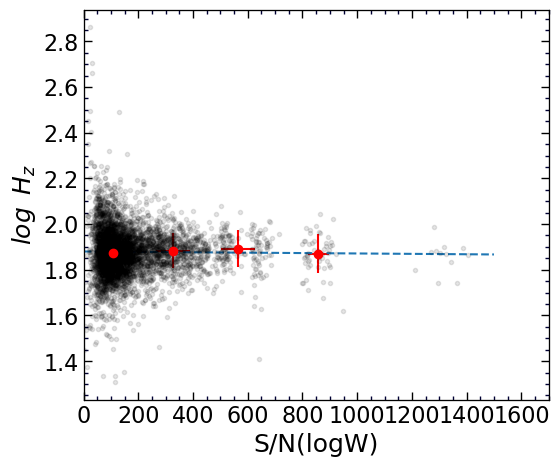

In [31]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

indx, = np.where((logH<3.2) & (logH>0) & (Vmod>4000) & (iii>0) & (I<-17) & (zzz>0)  & (rrr>0)
                 & (Sqlt>3) & (keep==1))

# indx, = np.where((logH<3.2) & (logH>0) & (Vmod>4000) & (logWimx_e<0.1) & (w11>10) & (Wqlt>3) & 
#                  (keep==1) & (W1>-16.1))

X0 = logWimx[indx]
print len(X0)
X  = logWimx_e[indx]
Ye = 0.2*dDM_edd[indx]
V  = Vmod[indx]
Y  = logH[indx]
ax.set_xlim(0,1700)
# ax.set_ylim(1.2,2.6)

P = X0/X

v = np.linspace(0,1500,50)


c = np.polyfit(P,Y, 1, w=1./Ye**2)

# Y  = logH[indx] - (c[0]*P)

print 'C[0]*P =',   c[0]

c = np.polyfit(P,Y, 1, w=1./Ye**2)
ax.plot(v,c[0]*v+c[1], '--')
ax.plot(P, Y, 'k.', alpha=0.1)

XL = []
YL = []
YLe = []
for i in np.arange(0,1000,250):
    xp = []
    yp = []
    for ii in range(len(P)):
        xi = P[ii]
        if xi>=i and xi<i+250:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>10:
        sqN = np.sqrt(len(xp))
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)  
        print np.median(xp), 10**np.median(yp)
        XL.append(np.median(xp))
        YL.append(np.median(yp))
        YLe.append(np.median(np.std(yp/sqN)))

ax.set_xlabel('S/N(logW)', fontsize=18) 
ax.set_ylabel(r'$log\/\/\/ H_z$', fontsize=18) 



set_axes(ax)
# Y  = logH[indx] - (c[0]*P)

print 10**c[1]
print c

C=  [0.00598362 1.87699607]
Median =  1.877306821317792
0.007 76.15438221999314
0.015 75.5299730061974
0.024 74.5514479185982
0.034 73.65188276799617
0.043 78.6447648321389
0.054 80.05895514388706
0.062 77.45682534110787
0.074 70.90483458993616
75.33487432837047
[0.00598362 1.87699607]


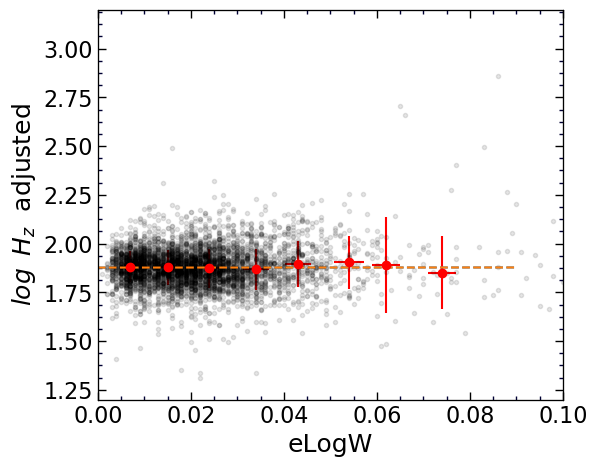

In [32]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

# indx, = np.where((logH<3.2) & (logH>0) & (Vmod>4000) & (iii>10) & (I<-17) & (zzz>10)  & (rrr>10)
#                  & (Sqlt>3) & (keep==1))

# indx, = np.where((logH<3.2) & (logH>0) & (Vmod>4000) & (logWimx_e<0.1) & (w11>10) & (Wqlt>3) & 
#                  (keep==1) & (W1>-16.1))

ax.set_xlim(0,0.1)
ax.set_ylim(1.2,3.2)
v = np.linspace(0,0.09,50)

xx = X
yy = Y
c = np.polyfit(xx, yy, 1, w=1./Ye**2)
ax.plot(v,c[0]*v+c[1], '--')

# print c
# Y  = Y - (c[0]*X+c[1]) + np.median(yy)

print 'C= ', c
print 'Median = ', np.median(yy)


c = np.polyfit(X,Y, 1, w=1./Ye**2)

ax.plot(X, Y, 'k.', alpha=0.1)
ax.plot(v,c[0]*v+c[1], '--')


XL = []
YL = []
YLe = []
for i in np.arange(0,0.08,0.01):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.01:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>10:
        sqN = np.sqrt(len(xp))
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)  
        print np.median(xp), 10**np.median(yp)
        XL.append(np.median(xp))
        YL.append(np.median(yp))
        YLe.append(np.median(np.std(yp/sqN)))

ax.set_xlabel('eLogW', fontsize=18) 
ax.set_ylabel(r'$log\/\/\/ H_z$'+'  adjusted', fontsize=18) 





set_axes(ax)

# x_ax, y_ax = set_axes(ax, (0, 0.1), (45,110), fontsize=12) 

# ax.set_yscale('log')

# from matplotlib.ticker import MultipleLocator

# from matplotlib.ticker import NullFormatter
# ax.yaxis.set_major_formatter(NullFormatter())  
# ax.yaxis.set_minor_formatter(NullFormatter())

# ax.yaxis.set_major_locator(MultipleLocator(10))
# ax.yaxis.set_minor_locator(MultipleLocator(5))

# plt.yticks([50,60,70,80,90,100,110], ('50','60','70','80','90','100','110'))
# ax.set_yticks(np.arange(50,120, step=10))


print 10**c[1]
print c

2.148 80.36697253317213
2.327 74.86881754640967
2.503 76.33089627009343
2.659 74.05718633344235
2.818 66.61857782259246
[-0.01905036  1.92451003]


(<matplotlib.axes._subplots.AxesSubplot at 0x7f99cc0a4dd0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f99cc97d8d0>)

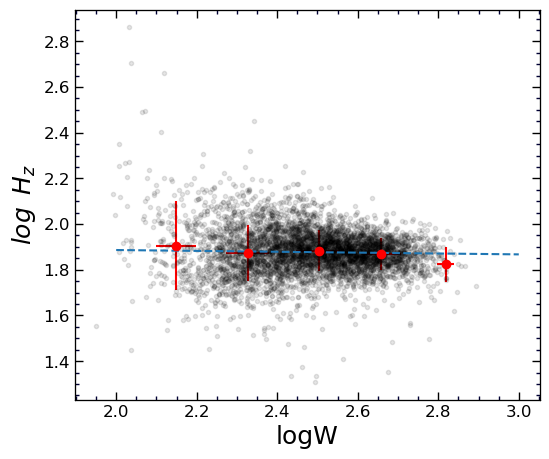

In [33]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


X = X0 

ax.plot(X, Y, 'k.', alpha=0.1)

for i in np.arange(2,3,0.2):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.2:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
        print np.median(xp), 10**np.median(yp)

ax.set_xlabel('logW', fontsize=18) 
ax.set_ylabel(r'$log\/\/\/ H_z$', fontsize=18) 

v = np.linspace(2,3,50)
# c = np.polyfit(XL,YL, 1, w=1./np.asarray(YLe))
c = np.polyfit(X,Y, 1, w=1./Ye)
ax.plot(v,c[0]*v+c[1], '--')


print c

set_axes(ax, fontsize=12)


4596.0 73.85428064101512
5417.0 74.52890103911105
6618.0 75.58453758359119
7422.0 75.82466503020215
8481.0 75.55128023447247
9475.0 76.49139087259115
10533.0 74.90142194649864
11486.5 76.65801738770378
12425.0 75.92023591388029
13448.0 74.74690733533758
14410.0 76.86500923769066
15595.0 75.06657232460293
16567.0 84.7620409259818
17348.0 75.82636022247334
74.79418442326086 76.40018948439004


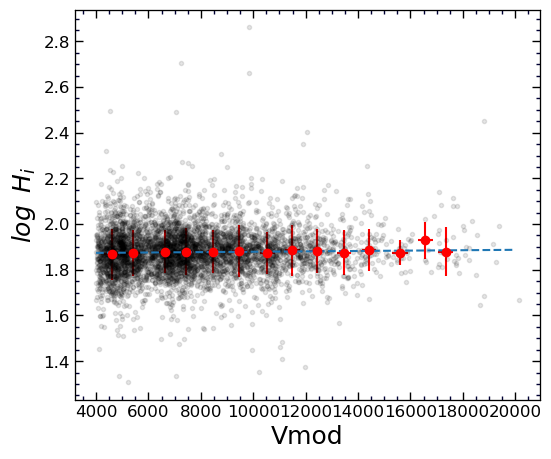

In [34]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


# indx, = np.where((logH<3.2) & (logH>0) & (Vmod>4000) & (logWimx_e<0.1) & (iii>10) & (I<-16) & (zzz>10) 
#                  & (Sqlt>3) & (keep==1))




# X0 = logWimx[indx]
# X  = logWimx_e[indx]
# Ye = 0.2*dDM_edd[indx]
# V  = Vmod[indx]
# Y  = logH[indx]





X = V

ax.plot(X, Y, 'k.', alpha=0.1)


# ix0 = np.where((X0>2.1) & (X0<2.2))
# ax.plot(X[ix0], Y[ix0], 'g.')
# ix0 = np.where(X0>2.8)
# ax.plot(X[ix0], Y[ix0], 'r.')


for i in np.arange(4000,18000, 1000):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+1000:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
        print np.median(xp), 10**np.median(yp)

ax.set_xlabel('Vmod', fontsize=18) 
ax.set_ylabel(r'$log\/\/\/ H_i$', fontsize=18) 

v = np.linspace(4000,20000,2000)
# c = np.polyfit(XL,YL, 1, w=1./np.asarray(YLe))
c = np.polyfit(X,Y, 1, w=1./Ye)
ax.plot(v,c[0]*v+c[1], '--')




set_axes(ax, fontsize=12)

print 10**(c[0]*4000.+c[1]), 10**(c[0]*15000.+c[1])


In [35]:
len(Y)

5055

In [36]:
len(iii[indx])

5055

1.263 1.3182567385564101
1.5485 1.0351421666793452


(2, 3)

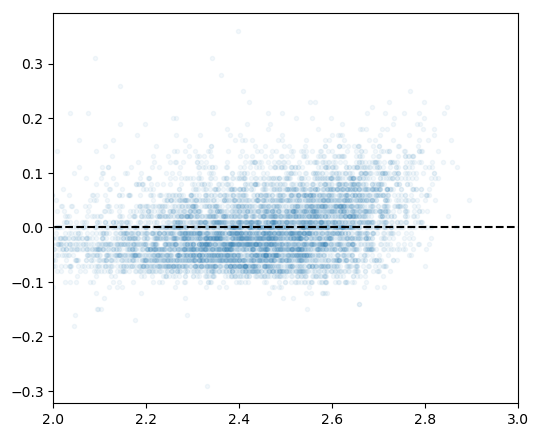

In [13]:
DMr  = table['DMr']
DMi  = table['DMi']
DMz  = table['DMz']
indx, = np.where((ggg>0) & (rrr>0) & (zzz>0) & (iii>0) & (Sqlt>3) & (keep==1))

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

X = logWimx[indx] #ggg[indx]-zzz[indx]
Y = DMr[indx]-DMz[indx]

ax.plot(X, Y, '.', alpha=0.05)


for i in np.arange(-0.5,1.5, 0.3):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.3:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
        print np.median(xp), 10**np.median(yp)

ax.plot([1.8,3], [0,0], 'k--')
ax.set_xlim(2,3)

In [18]:
np.median(DMi[indx]-DMz[indx])

0.0